## Spatial Filtering

The following program is an implementation of multiple filtering techniques. We first implement a Gaussian low pass filter that performs blurring on an image and then proceed to perform unsharp masking and high boost filtering. Further, a median filter is also designed and used to remove salt and pepper noise from the input image


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random

## Creating Gaussian Filter

In [2]:
def GaussianFilter(x,variance):
    val=np.zeros((x,x))
    val1=val.tolist()
    mid=x//2
    for k in range(0,x):
        for l in range(0,x):
            val1[k][l]=(-mid+l,-mid+k)
    val1=np.array(val1)
    #Creating Gaussian with mean 0 and variance 1
    var=variance
    Gaussian=np.zeros((x,x))
    for i in range(0,x):
        for j in range(0,x):
            Gaussian[i][j]=(1/(2*3.14*var))*np.exp((val1[i][j][0]**2 + val1[i][j][1]**2)/(2*var))
    print("The resulting ",x,"x",x," Gaussian filter is")
    print(Gaussian)  
    return Gaussian

## Convolution in two dimensions

In [3]:
def convolve2D(image, kernel, padding=0, strides=1):
    # Cross Correlation
    kernel = np.flipud(np.fliplr(kernel))

    # Gather Shapes of Kernel + Image + Padding
    xKernShape = kernel.shape[0]
    yKernShape = kernel.shape[1]
    xImgShape = image.shape[0]
    yImgShape = image.shape[0]

    # Shape of Output Convolution
    xOutput = int(((xImgShape - xKernShape + 2 * padding) / strides) + 1)
    yOutput = int(((yImgShape - yKernShape + 2 * padding) / strides) + 1)
    output = np.zeros((xOutput, yOutput))

    # Apply Equal Padding to All Sides
    if padding != 0:
        imagePadded = np.zeros((image.shape[0] + padding*2, image.shape[1] + padding*2))
        imagePadded[int(padding):int(-1 * padding), int(padding):int(-1 * padding)] = image
    else:
        imagePadded = image

    # Iterate through image
    for y in range(image.shape[1]):
        # Exit Convolution
        if y > image.shape[1] - yKernShape:
            break
        # Only Convolve if y has gone down by the specified Strides
        if y % strides == 0:
            for x in range(image.shape[0]):
                # Go to next row once kernel is out of bounds
                if x > image.shape[0] - xKernShape:
                    break
                try:
                    # Only Convolve if x has moved by the specified Strides
                    if x % strides == 0:
                        output[x, y] = (kernel * imagePadded[x: x + xKernShape, y: y + yKernShape]).sum()
                except:
                    break

    return output


In [4]:
num_dimensions=9
variance=12
lpf=GaussianFilter(num_dimensions,variance)
image=plt.imread('./landscape.jpg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray=cv2.resize(gray,(500,500))
op=convolve2D(gray, lpf,padding=4)


The resulting  9 x 9  Gaussian filter is
[[0.0503406  0.03760531 0.03053312 0.02694538 0.02584573 0.02694538
  0.03053312 0.03760531 0.0503406 ]
 [0.03760531 0.02809183 0.02280877 0.02012867 0.01930721 0.02012867
  0.02280877 0.02809183 0.03760531]
 [0.03053312 0.02280877 0.01851927 0.0163432  0.01567623 0.0163432
  0.01851927 0.02280877 0.03053312]
 [0.02694538 0.02012867 0.0163432  0.01442282 0.01383422 0.01442282
  0.0163432  0.02012867 0.02694538]
 [0.02584573 0.01930721 0.01567623 0.01383422 0.01326964 0.01383422
  0.01567623 0.01930721 0.02584573]
 [0.02694538 0.02012867 0.0163432  0.01442282 0.01383422 0.01442282
  0.0163432  0.02012867 0.02694538]
 [0.03053312 0.02280877 0.01851927 0.0163432  0.01567623 0.0163432
  0.01851927 0.02280877 0.03053312]
 [0.03760531 0.02809183 0.02280877 0.02012867 0.01930721 0.02012867
  0.02280877 0.02809183 0.03760531]
 [0.0503406  0.03760531 0.03053312 0.02694538 0.02584573 0.02694538
  0.03053312 0.03760531 0.0503406 ]]


<function matplotlib.pyplot.show(*args, **kw)>

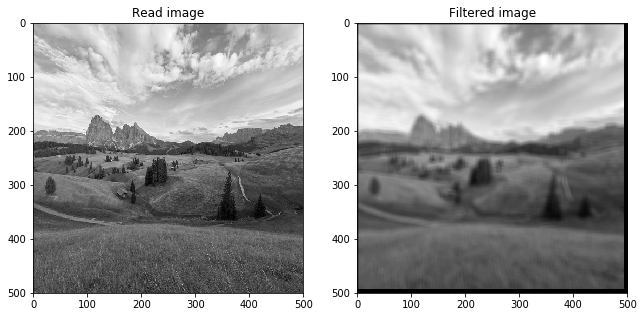

In [5]:
L=[gray, op]
for i in range(0,len(L)):
    plt.subplot(1,2,i+1)
    plt.imshow(L[i], cmap='gray')
    if(i==0):
        plt.title("Read image")
    else:
        plt.title("Filtered image")
    plt.subplots_adjust(right=1.5, top=5)
plt.show

## Unsharp masking and High Boost Filtering

<function matplotlib.pyplot.show(*args, **kw)>

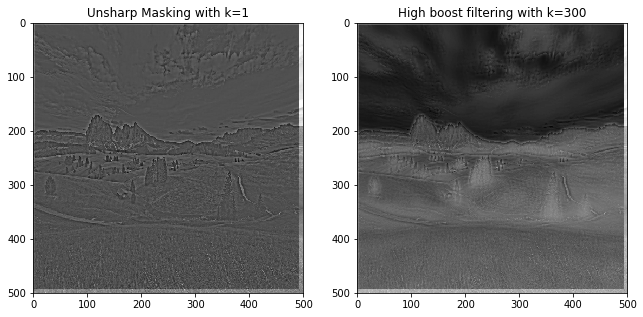

In [6]:
mask_image=np.subtract(gray,op)
#Performing unsharp masking
gray_unsharp=np.add(gray,mask_image)
#Performing high boost filtering
gray_boost=np.add(gray,300*mask_image)
spl=[gray_unsharp,gray_boost]
for i in range(0,len(spl)):
    plt.subplot(1,2,i+1)
    plt.imshow(spl[i], cmap='gray')
    if(i==0):
        plt.title("Unsharp Masking with k=1")
    else:
        plt.title("High boost filtering with k=300")
    plt.subplots_adjust(right=1.5, top=5)
plt.show

## Median Filtering

In [7]:
def median_filter(data, filter_size):
    temp = []
    indexer = filter_size // 2
    data_final = []
    data_final = np.zeros((len(data),len(data[0])))
    for i in range(len(data)):
        for j in range(len(data[0])):
            for z in range(filter_size):
                if i + z - indexer < 0 or i + z - indexer > len(data) - 1:
                    for c in range(filter_size):
                        temp.append(0)
                else:
                    if j + z - indexer < 0 or j + indexer > len(data[0]) - 1:
                        temp.append(0)
                    else:
                        for k in range(filter_size):
                            temp.append(data[i + z - indexer][j + k - indexer])

            temp.sort()
            data_final[i][j] = temp[len(temp) // 2]
            temp = []
    return data_final


## Adding Salt and Pepper noise to the image

In [8]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob 
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

## Noise filtering

<function matplotlib.pyplot.show(*args, **kw)>

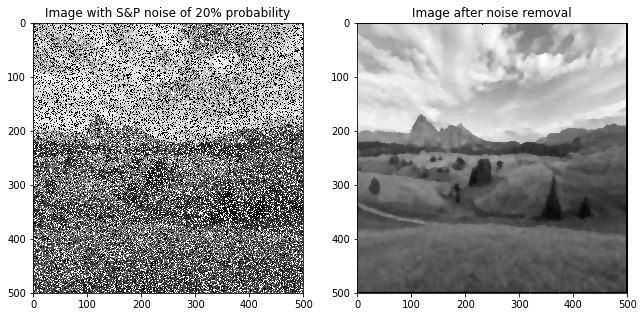

In [9]:
noisy_img=sp_noise(gray,0.22)
remove_noise=median_filter(noisy_img,9)
noise_rm=[noisy_img, remove_noise]
for i in range(0,len(noise_rm)):
    plt.subplot(1,2,i+1)
    plt.imshow(noise_rm[i], cmap='gray')
    if(i==0):
        plt.title("Image with S&P noise of 20% probability")
    else:
        plt.title("Image after noise removal")
    plt.subplots_adjust(right=1.5, top=5)
plt.show